# CLASSIFICATION - BREAST CANCER (DIAGNOSTIC)

## 1. Business Understanding

In this step, we get challenges and issues faced by a business. These may prevent a business from executing strategy and achieving goals. In some cases, business problems also threaten the long term survival of a firm.

### Context

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer where it depends on which cells in the breast turn into cancer.  When the patient diagnoses with a tumor, they will first determine if it's benign or malignant. Benign tumors are noncancerous. Malignant tumors are cancerous. Once the doctor determines what type of tumor you have, they can decide what treatment plan is best.

### Problem Statement

Based on the given context, the problem is how to differentiate the Benign tumors and Malignant tumors on the patient diagnoses based on the measurements of nuclear shape. Because the diagnoses will lead to the treatment itself. Better treatment comes from better predict.

### Goals

The goals of this project is we can differentiate the type of breast cancer by it types based on the sample (data) that we have. So we will make a Machine Learning - Supervised Learning - Classification to predict the data (Benign & Malignant tumors) based on measurements of nuclear shape that were made from digital images of fine needle aspirates of breast tissue masses from clinical samples.

Target : `diagnosis` variable
- M = malignant
- B = benign

## 2. Data Understanding

In this step, we will understanding the data such as; read the dataset, giving the descripton of variable (attributes of the data) due to seek the better understand data assets and manage accordingly.

- Data Source : https://www.kaggle.com/code/paultimothymooney/decision-trees-for-binary-classification-0-99/data

In [1]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
# Read the dataset
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# View the Data's type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As we can see that on our dataset we have 33 columns, 569 rows and there is no missing value.

## 3. Data Cleaning

In this step, we will process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicated, or incompleted data within a dataset. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.

As mentioned before, our dataset is cleaned from no missing value and based on the count of `id` variable, we already know that our dataset has no duplicated rows. But we will make sure it first.

In [4]:
# Check for duplicated rows
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


As we can see that our dataset has no duplicated rows.

### Delete unnecassarry column

On this step, we will delete unnecassary column that we think it's not truely effect to our dataset and this could be from our based knowledge. As far as we known, `id` and `Unnamed: 32` variable not have an affect to other variable in this dataset. So we will drop them.

In [5]:
# Drop unnecassarry column
df_clean = df.drop(['id','Unnamed: 32'], axis=1)
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4. Exploratory Data Analysis

Exploratory data analysis is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. So we do the Exploratory Data Analysis (EDA) to our data for better understanding.  

As we searched, what is different about benign vs malignant tumor are the benin tumor is smoothness and more regular borders than the malignant tumor. And looking by the dataset we had, we will made new variables called `df_mean`, `de_se` and `df_worst`.

In [6]:
# Create a new variable
df_mean = df_clean[(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])]
df_se = df_clean[(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])]
df_worst = df_clean[(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])]

### Distribution data of Mean features vs Target

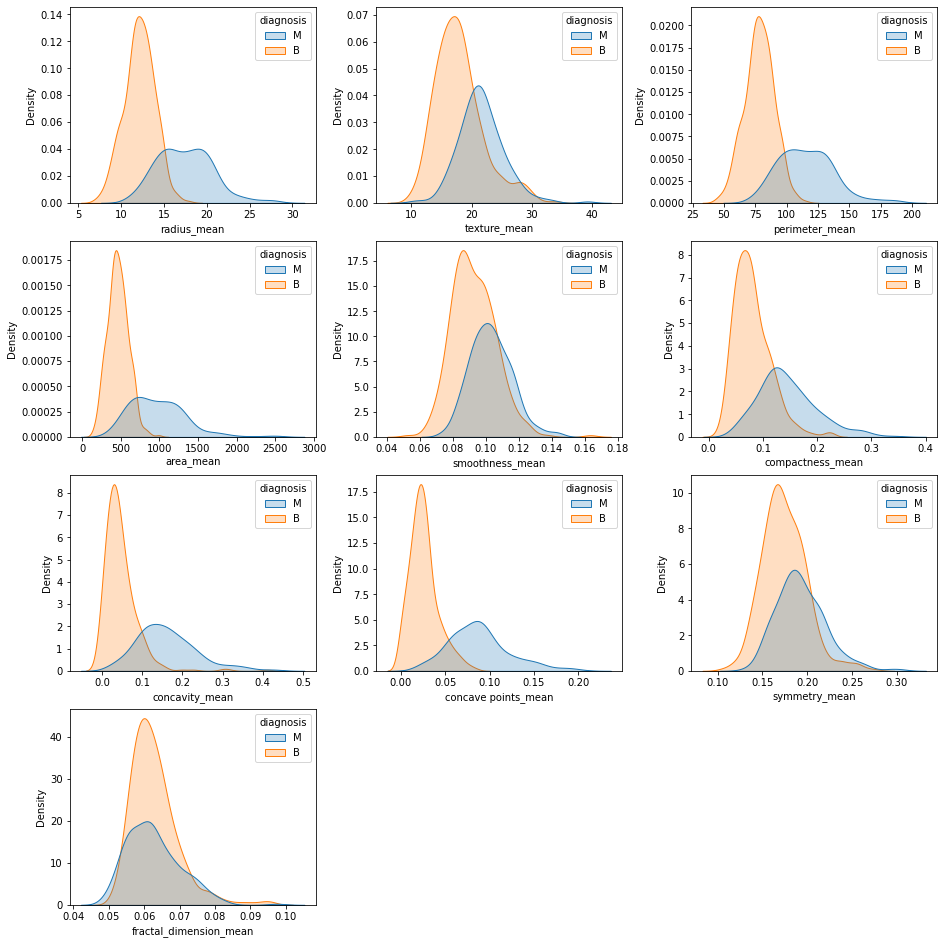

In [7]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
for i in range(len(df_mean.columns)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(data=df_mean, x=df_mean[df_mean.columns[i]], hue=df['diagnosis'], shade=True)

### Distribution data of Se features vs Target

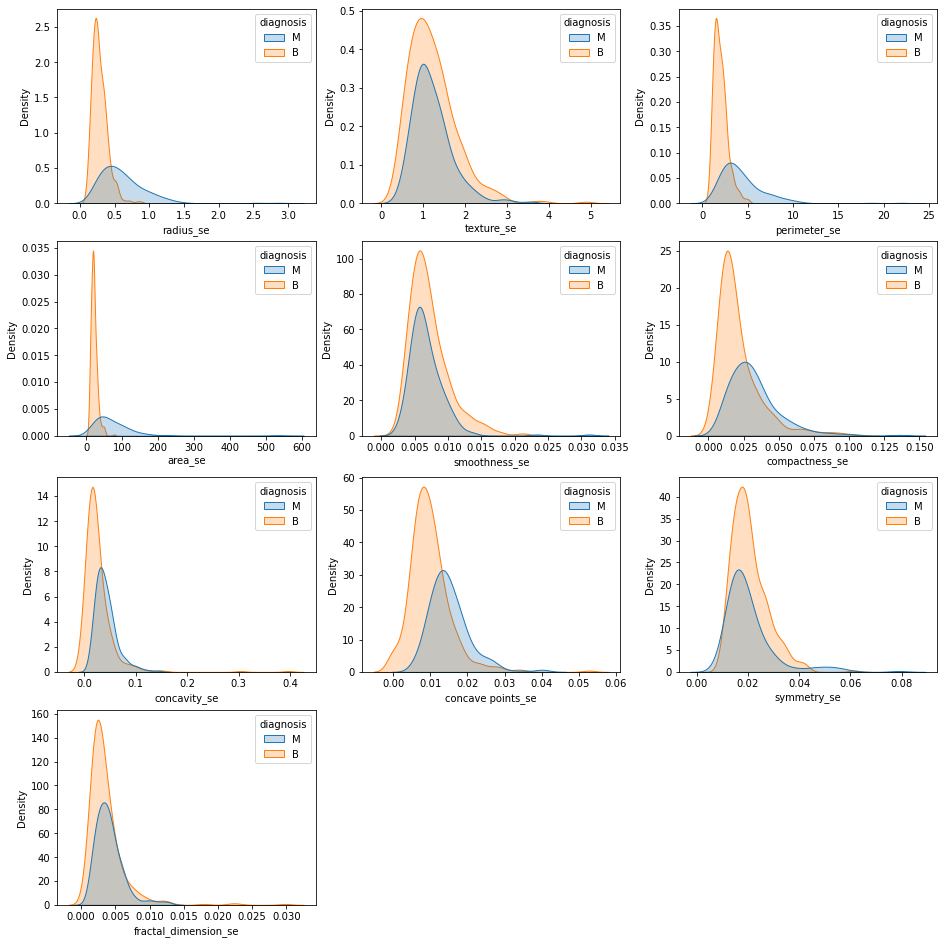

In [8]:
# Graph each variable df_se with target
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
for i in range(len(df_se.columns)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(data=df_se, x=df_se[df_se.columns[i]], hue=df['diagnosis'], shade=True)

### Distribution data of Worst features vs Target

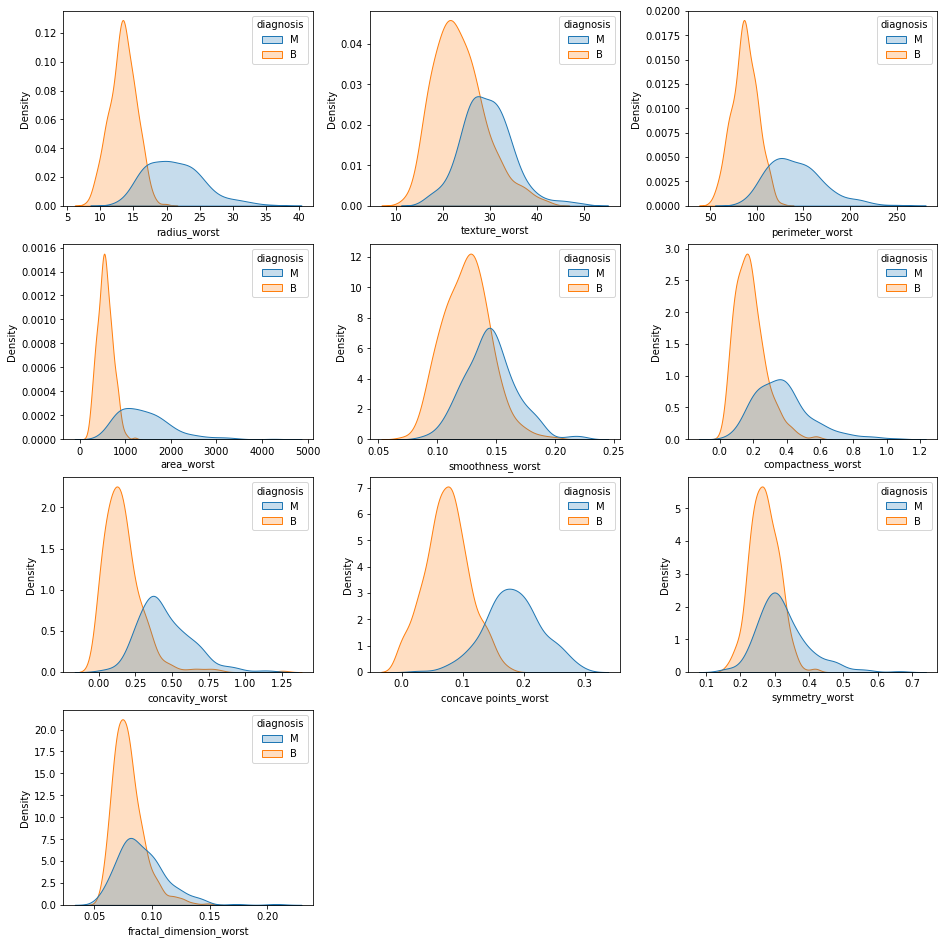

In [9]:
# Graph each variable df_worst with target
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
for i in range(len(df_worst.columns)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(data=df_worst, x=df_worst[df_worst.columns[i]], hue=df['diagnosis'], shade=True)

Overall, the benign tumor had a more specify (sharper) measurements of nuclear shape than the malignent one. Now we will visualize the data correlation of All Features.

### Correlation of All Features

Text(0.5, 1.05, 'Correlation of All Features')

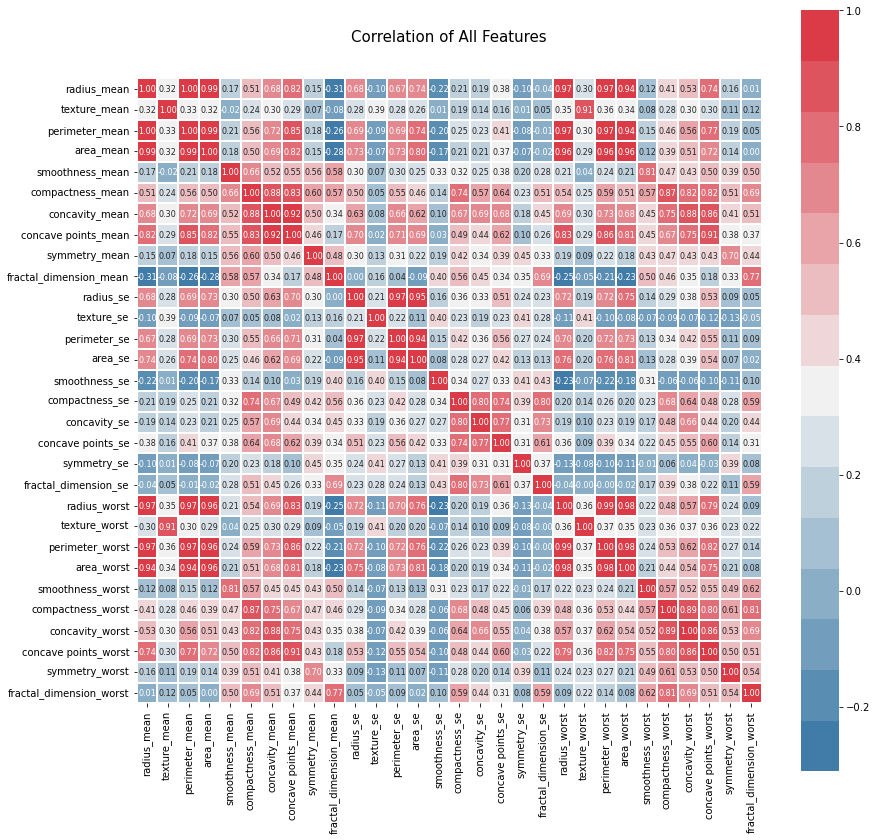

In [10]:
corr = df_clean.iloc[:,1:].corr()
colormap = sns.diverging_palette(240, 10, n=15)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of All Features', y=1.05, size=15)

## 5. Preprocessing

In this step, we will make a PCA and change value type of out target feature into the right value before we can go to the next stage (modeling).

### PCA

Based on the correlation heatmap above, we can see that our dataset have too many correlation of one feature to each other. We do also see that there is a multicollinearity (a perfect collinearity). And above that all we know that our dataset have a many features on that, this surely will increased computer throughput. So with this issue, we will make a PCA (Principal Component Analysis) before we goint tho the next step (Modeling).

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_clean.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502


### Data Transformation

In [12]:
# Change target variable 'diagnosis' to 0 & 1
df_clean['diagnosis'] = pd.Series(map(lambda x: dict(B=1, M=0)[x],
              df_clean['diagnosis'].values.tolist()), df_clean['diagnosis'].index)

## 5. Modeling

In this step, we will create a model to predict our dataset. The best model is the model which can get the highest accuraccy and get the best stable on that. As the final, we will compare and choose what is the best model based on the value etc.

In [13]:
# Import module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

In [14]:
# Define the Target and other Variables
X = principalDf
y = df_clean['diagnosis']

In [15]:
# Split the Target and other Variables with test_size 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 100)

In [16]:
# Import module
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [17]:
# Define the model
logreg = LogisticRegression(solver='lbfgs', max_iter=300, random_state = 100)
tree = DecisionTreeClassifier(random_state = 100)
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = svm.SVC(kernel='linear')

In [18]:
# Create a pipeline of mdoel
logreg_pipe = Pipeline([('model', logreg)])
tree_pipe = Pipeline([('model', tree)])
rfc_pipe = Pipeline([('model', rfc)])
knn_pipe = Pipeline([('model', knn)])
svm_pipe = Pipeline([('model', svm)])

In [19]:
for model in [logreg_pipe, tree_pipe, rfc_pipe, knn_pipe, svm_pipe]:
    model.fit(X_train, y_train)

In [20]:
accuracy = [accuracy_score(y_test, logreg_pipe.predict(X_test)),
                accuracy_score(y_test, tree_pipe.predict(X_test)),
                accuracy_score(y_test, rfc_pipe.predict(X_test)),
                accuracy_score(y_test, knn_pipe.predict(X_test)),
                accuracy_score(y_test, svm.predict(X_test))]
recall = [recall_score(y_test, logreg_pipe.predict(X_test)),
                recall_score(y_test, tree_pipe.predict(X_test)),
                recall_score(y_test, rfc_pipe.predict(X_test)),
                recall_score(y_test, knn_pipe.predict(X_test)),
                recall_score(y_test, svm.predict(X_test))]
precision = [precision_score(y_test, logreg_pipe.predict(X_test)),
                precision_score(y_test, tree_pipe.predict(X_test)),
                precision_score(y_test, rfc_pipe.predict(X_test)),
                precision_score(y_test, knn_pipe.predict(X_test)),
                precision_score(y_test, svm.predict(X_test))]
f1 = [f1_score(y_test, logreg_pipe.predict(X_test)),
                f1_score(y_test, tree_pipe.predict(X_test)),
                f1_score(y_test, rfc_pipe.predict(X_test)),
                f1_score(y_test, knn_pipe.predict(X_test)),
                f1_score(y_test, svm.predict(X_test))]

In [21]:
model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'SVM']
model_summary = pd.DataFrame({
    'model' : model_name,
    'accuracy score': accuracy,
    'recall score': recall,
    'precision score': precision,
    'f1 score': f1
})
model_summary

,model,accuracy score,recall score,precision score,f1 score
0,Logistic Regression,0.929825,0.958333,0.932432,0.945205
1,Decision Tree,0.929825,0.972222,0.921053,0.945946
2,Random Forest,0.956140,0.986111,0.946667,0.965986
3,KNeighbours,0.947368,0.986111,0.934211,0.959459
4,SVM,0.938596,0.958333,0.945205,0.951724


As we can see that the `Random Forest Model` has the great score overall. Let's we check out the result (output) of the prediction on our modeling in `Random Forest Model`.

In [22]:
# Define output variable
test = y_test, rfc_pipe.predict(X_test)
test1 = pd.DataFrame(test)

In [23]:
# Tranpose the columns and rows
testT = test1.T
print(testT)

     diagnosis  Unnamed 0
367        1.0        NaN
108        0.0        0.0
566        0.0        NaN
493        1.0        NaN
264        0.0        NaN
..         ...        ...
534        1.0        NaN
84         1.0        1.0
14         0.0        0.0
27         0.0        1.0
262        0.0        NaN

[114 rows x 2 columns]


In [24]:
# Drop Missing Value
testT.dropna(inplace = True)

# Change columns name
test = testT.rename(columns = {'Unnamed 0':'predict'})

# Create the value of our predict output
test['output'] = np.where((test['diagnosis'] == test['predict']), True, False)

In [25]:
# Show the predict output
test

,diagnosis,predict,output
108,0.0,0.0,True
87,0.0,0.0,True
65,0.0,1.0,False
2,0.0,0.0,True
8,0.0,0.0,True
105,0.0,1.0,False
91,0.0,1.0,False
38,0.0,1.0,False
104,1.0,1.0,True
106,1.0,0.0,False
